In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 학습용 데이터의 차원
print(X_train.shape, y_train.shape)
# 테스트 데이터의 차원
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# 학습용 데이터: 첫 번째 손글씨 데이터
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
# 테스트 데이터: 1~10행 출력
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


TypeError: Invalid shape () for image data

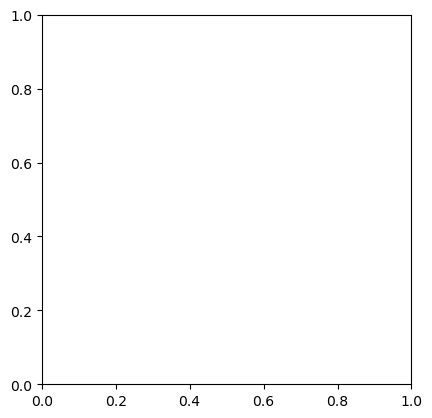

In [6]:
# 학습용 데이터의 그래프 출력: 첫 번째 손글씨 데이터
plt.imshow(X_train.shape[0], cmap='Greys')
plt.show()

In [7]:
# 입력 데이터의 차원 변환: 2차원(이미지 수 X 784)
X_train_2 = X_train.reshape(X_train.shape[0], 784)

In [8]:
# 각 열별 널 값의 빈도
nan = pd.DataFrame(X_train_2).isnull().sum()
print(nan)

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


In [9]:
# 널 값이 있는 열 출력
print(nan[nan!=0])

Series([], dtype: int64)


In [10]:
# 각 열별 픽셀의 강도 분석
X_train_2_pd = pd.DataFrame(X_train_2)
X_train_2_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [11]:
# 라벨별 빈도
y_cnt = pd.DataFrame(y_train).value_counts()
print(y_cnt)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


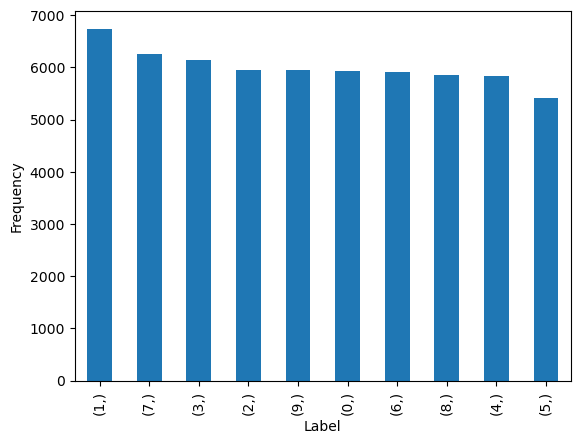

In [12]:
# 라벨별 빈도에 대한 바 차트 출력
y_cnt.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [13]:
# 입력 데이터 정규화
X_train_norm = X_train.astype('float32')/255
X_test_norm = X_test.astype('float32')/255

# 1행 출력
print(X_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# 출력 데이터의 원-힛 인코딩
y_train_class = to_categorical(y_train)
y_test_class = to_categorical(y_test)
# 1~10행 출력
print(y_test_class[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
# 모형 구조
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# 모형 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 모형 구성
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
# 학습
results = model.fit(X_train_norm, y_train_class,
                   validation_data=(X_test_norm, y_test_class),
                   epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8635 - loss: 0.4706 - val_accuracy: 0.9606 - val_loss: 0.1326
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9673 - loss: 0.1142 - val_accuracy: 0.9685 - val_loss: 0.0977
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9785 - loss: 0.0701 - val_accuracy: 0.9777 - val_loss: 0.0745
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9862 - loss: 0.0482 - val_accuracy: 0.9796 - val_loss: 0.0691
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9899 - loss: 0.0355 - val_accuracy: 0.9796 - val_loss: 0.0658
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9927 - loss: 0.0262 - val_accuracy: 0.9788 - val_loss: 0.0685
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0202 - val_accuracy: 0.9799 - val_loss: 0.0656
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9964 - loss: 0.0146 - val_acc

In [19]:
# 학습모형에 저장된 키 (변수)
print(results.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


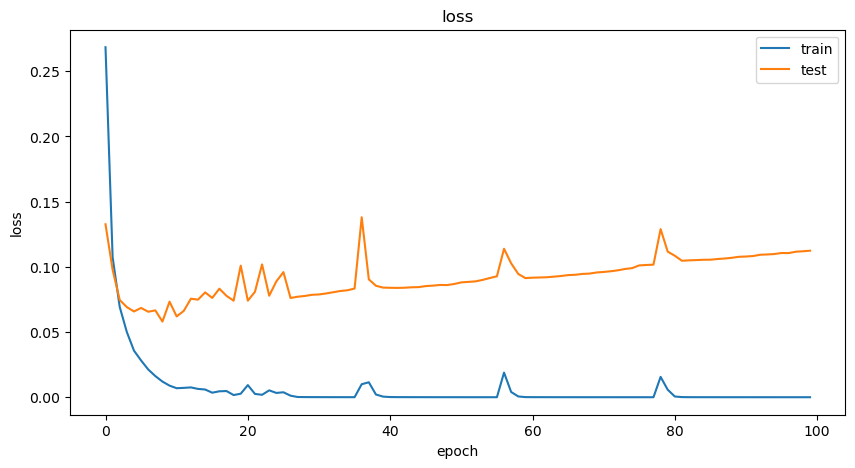

In [23]:
# 학습 수에 따른 loss 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

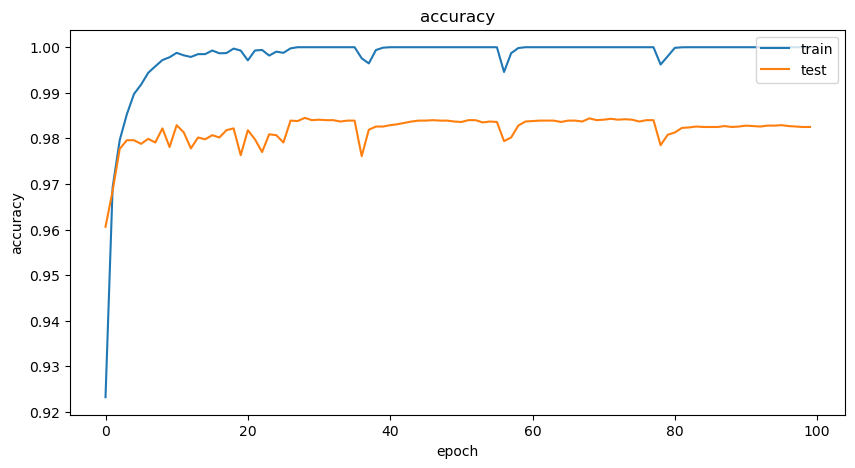

In [25]:
# 학습 수에 따른 정확도 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
# 모형 테스트
score = model.evaluate(X_test_norm, y_test_class)
print("Test loss", score[0])
print("Test Accuracy", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.1301
Test loss 0.11234652996063232
Test Accuracy 0.9825000166893005


In [28]:
# 예측[2]
y_pred = model.predict(X_test_norm)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[2.1112759e-21 1.2906775e-26 1.3329189e-18 ... 1.0000000e+00
  3.0439189e-19 1.9632290e-16]
 [9.1916503e-24 1.9124464e-17 1.0000000e+00 ... 2.1494367e-37
  1.3168423e-18 3.6563153e-37]
 [5.9292326e-17 1.0000000e+00 2.0770072e-12 ... 3.5120001e-11
  7.3464951e-10 1.5462541e-18]
 ...
 [2.7413406e-35 2.4903990e-27 2.5630123e-34 ... 4.6850977e-17
  3.3361571e-21 5.2565351e-18]
 [1.1346030e-28 2.4783909e-35 3.1712783e-34 ... 1.6288742e-29
  4.2617663e-16 6.1746376e-37]
 [2.0245767e-30 3.3077261e-33 1.7224158e-23 ... 1.9616606e-35
  7.5753398e-31 3.5026876e-34]]


In [29]:
# 예측 값의 라벨
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

[7 2 1 ... 4 5 6]


In [32]:
# 교차표: 실제 값 대비 예측 값
pd.crosstab(y_test, y_pred_class)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,1,1,0,0,0,3,1,2,0
1,0,1125,4,1,0,0,2,0,3,0
2,4,1,1009,1,1,0,2,5,8,1
3,0,0,4,992,0,2,0,3,2,7
4,0,0,4,0,964,0,3,2,1,8
5,2,1,0,7,1,872,4,2,2,1
6,3,3,1,1,2,5,943,0,0,0
7,1,2,8,1,0,0,0,1008,3,5
8,1,0,3,4,4,3,0,4,952,3
